In [3]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from time import time
import math
path_data1 = '/Users/SY/Desktop/obic/data/'#'D:/DATA/OBIC/'
path_data2 = 'C:/Users/1234/DATA/'
data_go = fits.open(path_data1 + 'gosss_2mass_new.fits')

In [4]:
start_time = time()
f = data_go[1].data
print(f)

[ ('1 Cam A', 'Ma', '151.91+03.95_01', '28 446', 'A',   6.        ,   5.4000001 ,  0.60000002, '', 'O9.7', 'II', 'n', '', 'S14', '04:32:01.845', '+53:54:39.03',   68.0076875,  53.9108417,  151.9142569,   3.95082490e+00, 'TA', '', 'Cam OB1', '04320185+5354389',   68.007716,  53.910824,  0.08      ,  0.06      ,    0.,   5.42600012,   5.45900011,   5.45300007,  0.018     ,  0.016     ,  0.016     , 'AAA', 111, 0,  2451170.7713,   8.78220000e-02)
 ('10 Lac', 'Ma', '096.65-16.98_01', '214 680', '',   4.69999981,   5.30000019, -0.60000002, '', 'O9', 'V', '', '', 'S11a', '22:39:15.679', '+39:03:01.01',  339.8153292,  39.0502806,   96.6508907,  -1.69833387e+01, 'TB', 'Sh 2-126', 'Lac OB1', '22391567+3903011',  339.815317,  39.050308,  0.08      ,  0.07      ,    0.,   5.30299997,   5.43599987,   5.49800014,  0.037     ,  0.016     ,  0.029     , 'EAA', 111, 0,  2451096.6399,   1.04371000e-01)
 ('14 Cep', 'Ma', '102.01+02.18_01', '209 481', '',   5.5999999 ,   5.4000001 ,  0.2       , '', 'O9'

In [5]:
spt = list(f['STv3'])


In [6]:
# 分类(肉眼分类)
# 写成函数
def divid(s):
    # s is a string
    if 'N' in s or 'C' in s:
        new_s = s[2:]
    else:
        new_s = s[1:]
    if ':' in new_s:
        new_s = new_s[:-1]
    if '-' in new_s:
        new_s = new_s[:-2]
    f_s = float(new_s)
    #print(f_s)
    return f_s
#    return round(f_s*2)/2 #round可能不可靠
#     return math.floor(f_s)

In [7]:
#math.floor(9.7)
for s in spt:
    f_s = divid(s)

In [8]:
#直接计算直方图的频数（算法有点粗暴）
new_spt = []
for s in spt:
    new_spt.append(divid(s))
    

figure_spt = np.array(new_spt) #散点
figure_spt_sort = np.sort(np.array([i for i in set(figure_spt)]))
count = []
for i in range(len(figure_spt_sort)):
    k = 0
    for ele in new_spt:
        if ele == figure_spt_sort[i]:
            k = k + 1
    count.append(k)
#print(count)
print(figure_spt_sort)

[ 2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.   7.5  8.   8.5  9.
  9.2  9.5  9.7]


In [9]:
#give color(JH) or else in 2MASS
color_JH = f['Jmag']-f['Hmag']
[ra,dec] = [f['RAd'],f['decd']]
print(np.min(color_JH))
color_JH = color_JH[:, np.newaxis]

ra = ra[:, np.newaxis]
dec = dec[:, np.newaxis]

figure_spt = figure_spt[:, np.newaxis]


ra_dec1=np.concatenate((ra,dec), axis = 1)
c_ra_dec1=np.concatenate((color_JH,ra_dec1), axis = 1)
c_ra_dec=np.concatenate((c_ra_dec1,figure_spt), axis = 1)


np.min(c_ra_dec1[:,0])

-2.827


-2.8270001411437988

In [10]:
#fit scatter

ic = []
ratio = 20
c_ra_dec_fin = np.array([0,0,0,0])
for i in range(len(figure_spt_sort)):
    bin = []
    for ele_num in range(len(spt)):
        if figure_spt[ele_num] == figure_spt_sort[i]:
            bin.append(c_ra_dec[ele_num,:])
    bin_ara = np.array(bin)
    print(bin_ara.shape)
    #select the fit dot
    ratio_integer = math.ceil(len(bin_ara[:,0])*ratio/100)
    sort = bin_ara[np.lexsort(bin_ara[:,::-1].T)] 
    #print(sort)
    #print(sort[:,0][:ratio_integer])
    a = np.median(sort[:,0][:ratio_integer])
    index = np.where(sort[:,0]<=np.max(sort[:,0][:ratio_integer]))
    #print(sort[index[0],:])
    c_ra_dec_final = sort[index[0],:]
    #print(c_ra_dec_final.shape)
    c_ra_dec_fin = np.vstack((c_ra_dec_fin,c_ra_dec_final))
    ic.append(float(a))
c_ra_dec_fin = c_ra_dec_fin[1:,:]
use_ic = np.array(ic)
use_spt = np.array(figure_spt_sort)
print(len(use_ic))
print(len(use_spt))
print(use_ic.shape)
print(use_spt)
print(c_ra_dec_fin.shape)

(3, 4)
(1, 4)
(3, 4)
(12, 4)
(16, 4)
(14, 4)
(19, 4)
(19, 4)
(37, 4)
(49, 4)
(64, 4)
(51, 4)
(60, 4)
(39, 4)
(50, 4)
(29, 4)
(57, 4)
(66, 4)
18
18
(18,)
[ 2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.   7.5  8.   8.5  9.
  9.2  9.5  9.7]
(126, 4)


In [11]:
whole_figure = np.vstack((use_spt , use_ic)).T
print(whole_figure)

[[  2.00000000e+00   9.00001526e-02]
 [  2.50000000e+00   2.90000439e-01]
 [  3.00000000e+00   1.00040436e-03]
 [  3.50000000e+00   5.10001183e-02]
 [  4.00000000e+00  -1.20000839e-02]
 [  4.50000000e+00   1.80001259e-02]
 [  5.00000000e+00  -2.14998722e-02]
 [  5.50000000e+00  -5.29999733e-02]
 [  6.00000000e+00   4.99963760e-03]
 [  6.50000000e+00  -3.34997177e-02]
 [  7.00000000e+00  -3.00002098e-02]
 [  7.50000000e+00  -3.49998474e-02]
 [  8.00000000e+00  -3.30001116e-02]
 [  8.50000000e+00  -5.99999428e-02]
 [  9.00000000e+00  -5.50003052e-02]
 [  9.20000000e+00  -1.19000077e-01]
 [  9.50000000e+00  -9.75000858e-02]
 [  9.70000000e+00  -5.90002537e-02]]


In [12]:
# SFD ratio

ratio_SFD = 5

# fitting curve


fc = np.polyfit(use_spt, use_ic, 3)#用3次多项式拟合
fitcurve = np.poly1d(fc)
# print(fitcurve) #在屏幕上打印拟合多项式

colorvals=fitcurve(use_spt)

# print(len(colorvals),len(int_teff))
#print(len(bin_tbl_final[teff].values))

# SFD_tbl_ratio[teff]

In [13]:
from __future__ import print_function
import numpy as np
import pandas as pd

from astropy.coordinates import SkyCoord
from dustmaps.sfd import SFDQuery

sfd = SFDQuery()

Consts = pd.DataFrame({'J':np.array([0.709]),\
'H':np.array([0.449]),\
'g':np.array([3.303]),\
'r':np.array([2.285]),\
'i':np.array([1.698])})
# Const1 = 0.709 #J #3.303 #g #2.285 #r
# Const2 = 0.449 #H #2.285 #r #1.698 #i

def SFD_IC(Catalog_raw,color1,color2):
    # Using ebv from SFD to get the intrinsic color

    Intrinsic_color = []

    for i in range(len(Catalog_raw)):
        coords = SkyCoord(Catalog_raw[i,1],Catalog_raw[i,2],frame = 'icrs',unit = 'deg')
        ebv = sfd(coords)
        A_c1 = Consts[color1].values*ebv
        A_c2 = Consts[color2].values*ebv

        Intrinsic_color.append(Catalog_raw[i,0] - A_c1 + A_c2)
    Intrinsic_color = np.array(Intrinsic_color)
    return Intrinsic_color
SFD_catalog_color_all = SFD_IC(c_ra_dec,'J','H').reshape(-1,1)

In [14]:
SFD_catalog_color = []
SFD_catalog_teff = []
for i in range(SFD_catalog_color_all.shape[0]):
    if SFD_catalog_color_all[i,0]<0.17 and SFD_catalog_color_all[i,0]>-0.43:
        SFD_catalog_color.append(SFD_catalog_color_all[i,0])
        SFD_catalog_teff.append(c_ra_dec[i,3])
SFD_catalog_color = np.array(SFD_catalog_color).reshape(-1,1)
SFD_catalog_teff = np.array(SFD_catalog_teff).reshape(-1,1)
print(SFD_catalog_color)


whole_sfd = np.hstack((SFD_catalog_teff , SFD_catalog_color))


mean = []
for i in range(len(figure_spt_sort)):
    sfd_bin = []
    for ele_num in range(len(whole_sfd[:,0])):
        if whole_sfd[ele_num,0] == figure_spt_sort[i]:
            sfd_bin.append(whole_sfd[ele_num,1])
    mean.append(np.mean(sfd_bin))
print(mean)

[[-0.25988922]
 [-0.17329091]
 [ 0.10822022]
 [-0.13599573]
 [-0.38054948]
 [-0.15182568]
 [-0.27417932]
 [-0.08162732]
 [-0.1635658 ]
 [-0.35911221]
 [-0.11925748]
 [-0.24046652]
 [-0.22133326]
 [-0.21131373]
 [-0.29861562]
 [-0.18871868]
 [-0.14774193]
 [-0.42561882]
 [-0.05355368]
 [-0.39825617]
 [-0.15418524]
 [-0.23558672]
 [-0.20963318]
 [-0.19639284]
 [-0.20540393]
 [-0.37201279]
 [-0.33018842]
 [-0.34366648]
 [-0.35287919]
 [-0.04599989]
 [-0.18207551]
 [-0.14679716]
 [-0.03534698]
 [-0.24817096]
 [-0.31080307]
 [-0.06644424]
 [-0.17417758]
 [-0.3379195 ]
 [ 0.09245097]
 [ 0.10101294]
 [-0.16772259]
 [-0.28714849]
 [-0.31707462]
 [-0.05346715]
 [-0.35948674]
 [-0.11425417]
 [-0.15879881]
 [-0.30367749]
 [-0.11592623]
 [-0.3431256 ]
 [-0.29007903]
 [-0.12862292]
 [-0.18482598]
 [-0.16270874]
 [-0.19446458]
 [-0.21744459]
 [-0.08990343]
 [-0.13922547]
 [-0.17498603]
 [-0.11559975]
 [-0.32102008]
 [-0.38423464]
 [-0.13272058]
 [-0.23939843]
 [-0.13968544]
 [-0.13930295]
 [-0.12091

/Users/SY/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/SY/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [15]:
sfd1 = SFDQuery()

## ebv前的系数需要去文献中拿到。目前使用的是r和i的
# Const1 = 0.709 #J #3.303 #g #2.285 #r 
# Const2 = 0.449 #H #2.285 #r #1.698 #i

#time_start = time.time()
SFD_catalog_color1 = []
SFD_catalog_teff1 = []
lens1 = len(c_ra_dec_fin[:,0])

ebv_final1 = []

# 判断ebv < 0.05，就拿入下一个数组，最后一起画在图上
print(lens1)
for i in range(lens1):
    coords1 = SkyCoord(c_ra_dec_fin[i,1],c_ra_dec_fin[i,2],\
                      frame = 'icrs',unit = 'deg')
    ebv1 = sfd(coords1)
    ebv_final1.append(ebv1)
    
#     A_c1 = Const1*ebv;
#     A_c2 = Const2*ebv;

    if ebv1 < 0.05:
        SFD_colorindex1 = c_ra_dec_fin[i,0]
        SFD_catalog_color1.append(SFD_colorindex1)
    
        SFD_catalog_teff1.append(c_ra_dec_fin[i,3])
        print(i)
#     print(i)

#print(time.time() - time_start)
print(SFD_catalog_teff1,SFD_catalog_color1)


126
70
100
101
[8.0, 9.5, 9.5] [-0.026999950408935547, -0.15399980545043945, -0.14799976348876953]


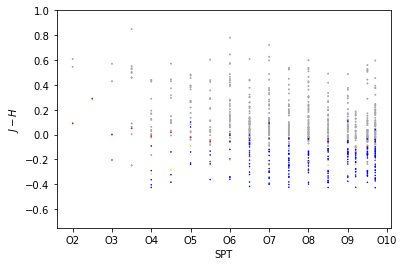

In [23]:
plt.scatter(figure_spt,color_JH ,c='darkgrey', s=3, edgecolors='None', alpha=0.9)
plt.scatter(use_spt,use_ic, c='r', edgecolors='None', s=2,label='Median of\nthe bluest 5%')
plt.scatter(SFD_catalog_teff,SFD_catalog_color,alpha=0.8,edgecolors='None',c='b',s=2,label='SFD dustmap',zorder=2)
plt.scatter(figure_spt_sort,mean,alpha=0.8,edgecolors='None',c='gold',s=2,label='SFD dustmap(mean)',zorder=2)
plt.xlabel('SPT') ; plt.ylabel('$J-H$')


scale_ls = range(2,11)  
index_ls = ['O2','O3','O4','O5','O6','O7','O8','O9','O10']  
plt.xticks(scale_ls,index_ls)  ## 可以设置坐标字


plt.ylim(-0.75,1.0)
#plt.legend(loc='lower right')
plt.savefig(path_data1+'pictures/'+'2018_5_3_GOSSS_new2.png', dpi=200)
plt.show()

In [78]:
a=np.array([1,2,3])
b=np.array([1,2,4])
a = a[:, np.newaxis]
b = b[:, np.newaxis]
v=np.concatenate((a.T,b.T), axis = 0)
v

array([[1, 2, 3],
       [1, 2, 4]])

## 参数分布

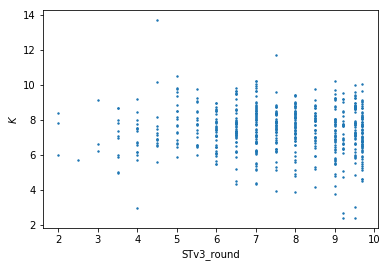

In [41]:
#看K星等的分布
Kmag = list(f['Kmag'])
plt.figure()
plt.scatter(figure_spt,Kmag,s=2)
plt.xlabel('STv3_round') ; plt.ylabel('$K$')
plt.savefig(path_data1+'pictures/'+'2018_5_3_GOSSS_Kmag.png', dpi=200)
plt.show()

In [21]:
print(list(range(2,11)))

[2, 3, 4, 5, 6, 7, 8, 9, 10]
